In [2]:
import numpy as np

import matplotlib.pyplot as plt

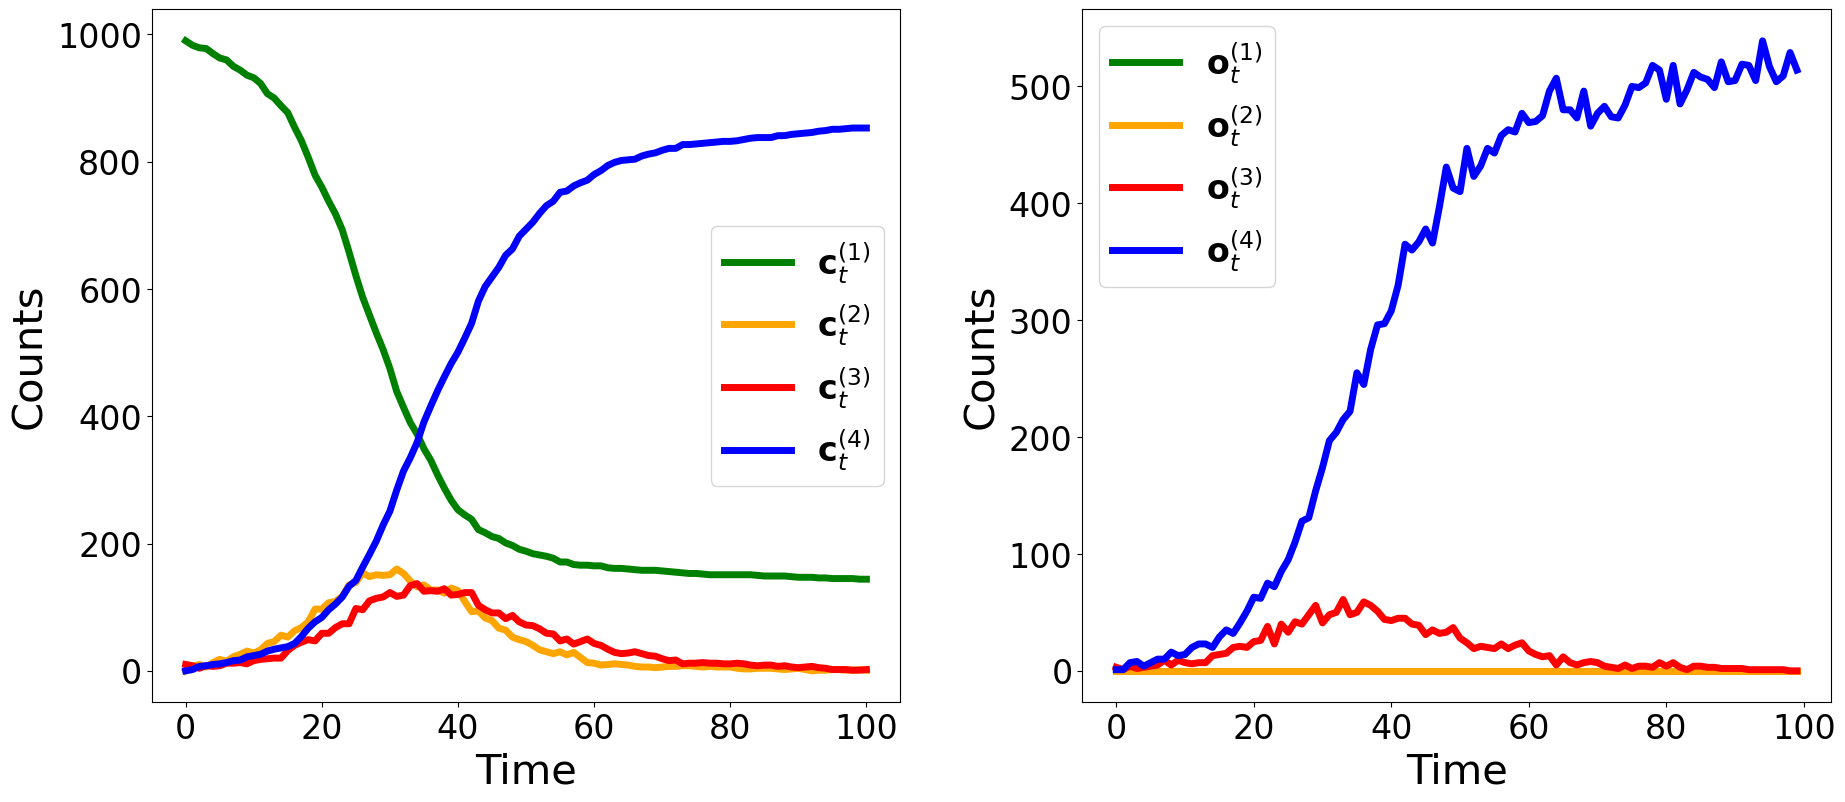

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 10), dpi = 100)
fig.tight_layout(pad=10)

C_true = np.load("Data/Input/C_SEIR.npy")
Y_true = np.load("Data/Input/Y_SEIR.npy")
color_true = ["green", "orange", "red", "blue" ]

ax[0].tick_params(axis='both', labelsize=24)
ax[1].tick_params(axis='both', labelsize=24)

ax[0].set_ylabel(r"Counts", fontsize = 30, labelpad = 5)
ax[0].set_xlabel(r"Time", fontsize = 30, labelpad = 5)

ax[1].set_ylabel(r"Counts", fontsize = 30, labelpad = 5)
ax[1].set_xlabel(r"Time", fontsize = 30, labelpad = 5)

label_c = [r"$\mathbf{c}_t^{(1)}$", r"$\mathbf{c}_t^{(2)}$", r"$\mathbf{c}_t^{(3)}$", r"$\mathbf{c}_t^{(4)}$"]
label_o = [r"$\mathbf{o}_t^{(1)}$", r"$\mathbf{o}_t^{(2)}$", r"$\mathbf{o}_t^{(3)}$", r"$\mathbf{o}_t^{(4)}$"]
for i in range(4):

    ax[0].plot(np.sum(C_true, axis =0)[i, :], color = color_true[i], linewidth = 5, label = label_c[i])
    ax[1].plot(np.sum(Y_true, axis =0)[i, 1:], color = color_true[i], linewidth = 5, label = label_o[i])

ax[0].legend(fontsize = 24)
ax[1].legend(fontsize = 24)

# ESS experiment

In [2]:
ESS_SIS_numpy = np.load("Data/ESS/SEIR_ESS_SIS_numpy.npy")
ESS_SIS_numpy[np.isnan(ESS_SIS_numpy)] = 0
ESS_SIS_numpy = ESS_SIS_numpy[np.array([0,1,3,7,8,10,12]),:]

In [3]:
algorithm_list = ["BPF", "APF"]

h_list = [1, 5, 10, 20, 50]
for h in h_list:
    algorithm_list.append("h="+str(h))

color_list = ["orange", "red"]


cmap = plt.get_cmap('viridis', 5*len(h_list))
for i in range(len(h_list)):
    color_list.append(cmap(5*len(h_list)-4*(len(h_list)-i)))

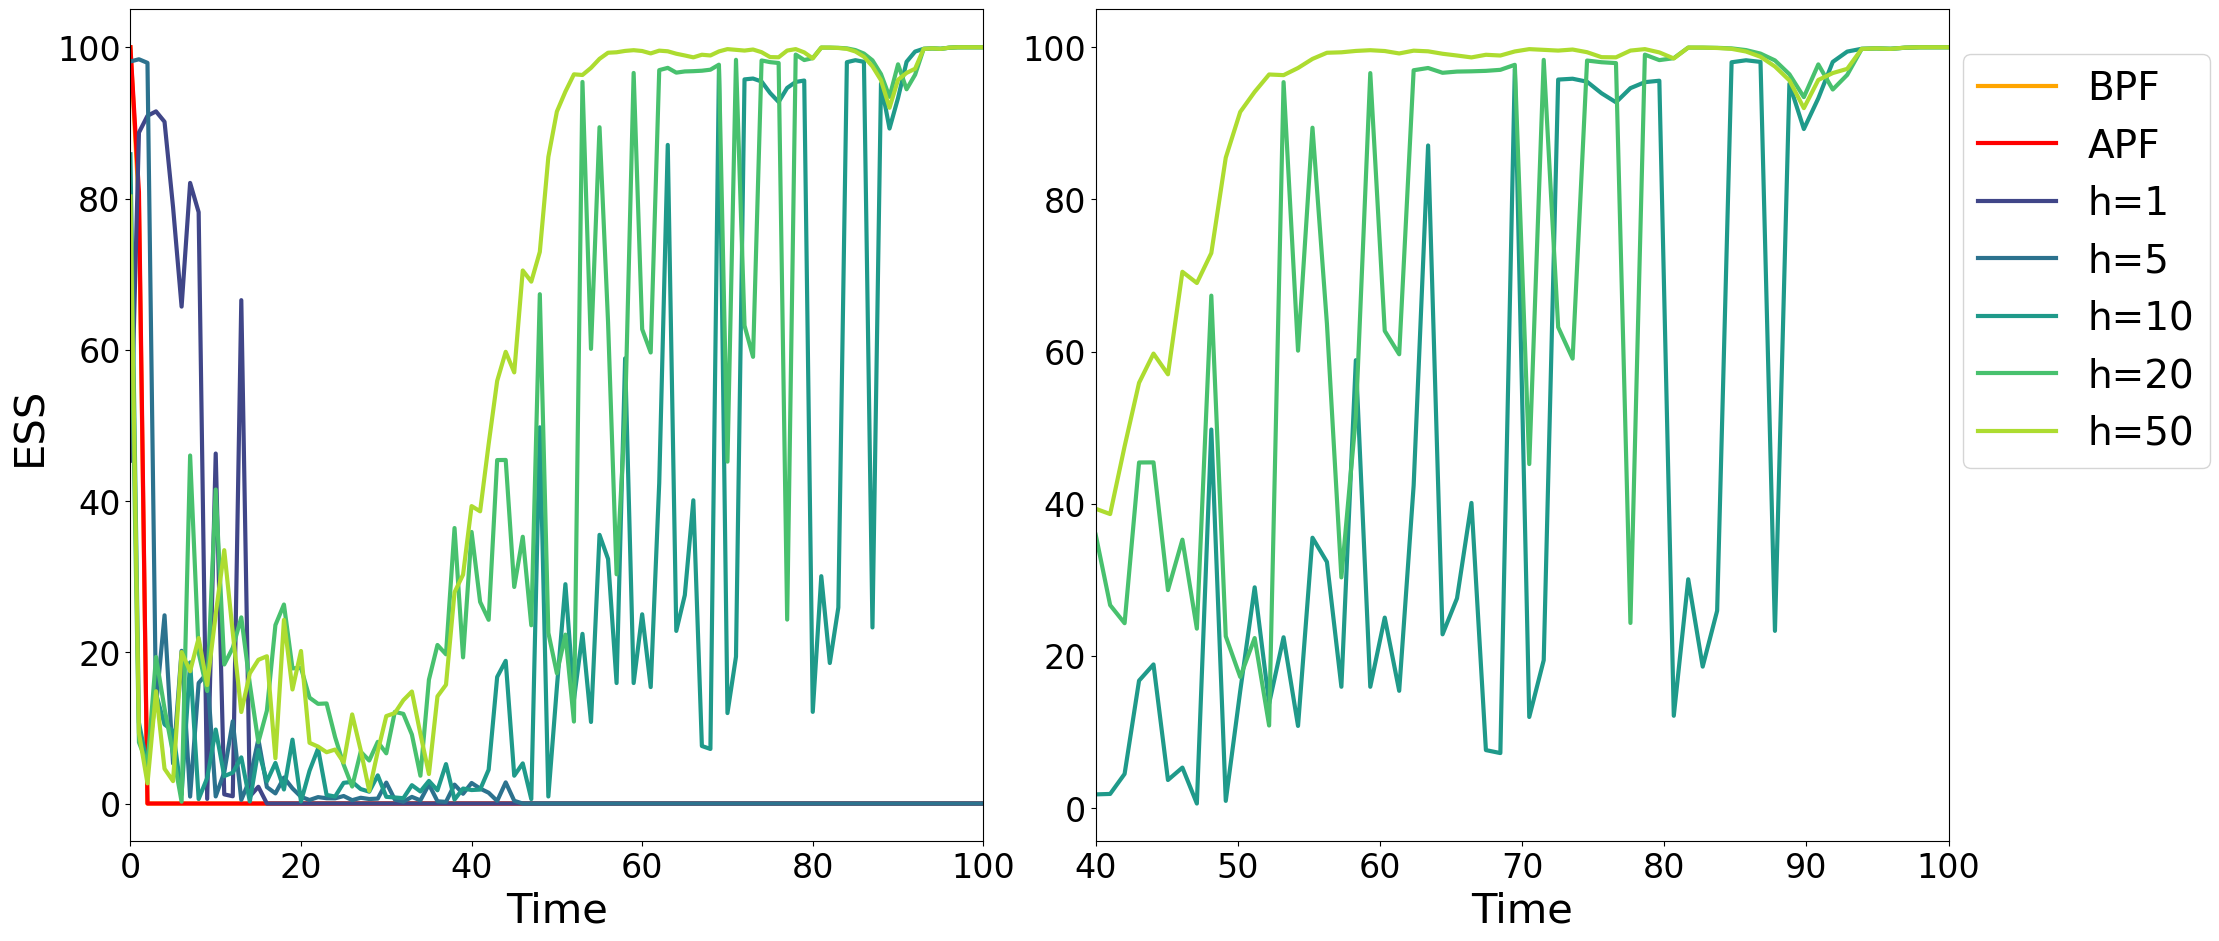

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 10), dpi = 100)
fig.tight_layout(pad=5)

ax[0].tick_params(axis='both', labelsize=24)
ax[1].tick_params(axis='both', labelsize=24)

ax[0].set_xlim((0, 100))
ax[1].set_xlim((40, 100))

ax[0].set_ylabel(r"ESS", fontsize = 30, labelpad = 5)
ax[0].set_xlabel(r"Time", fontsize = 30, labelpad = 5)
ax[1].set_xlabel(r"Time", fontsize = 30, labelpad = 5)

for i in range(ESS_SIS_numpy.shape[0]):

    ax[0].plot(ESS_SIS_numpy[i,:], label = algorithm_list[i], color = color_list[i], linewidth = 3)
    
for i in range(4, ESS_SIS_numpy.shape[0]):

    ax[1].plot(np.linspace(40, ESS_SIS_numpy.shape[1], ESS_SIS_numpy.shape[1]-40), ESS_SIS_numpy[i,40:], color = color_list[i], linewidth = 3)

fig.legend(bbox_to_anchor=(1.1, 0.9), fontsize = 28)

# Likelihood variance experiment

In [5]:
CostTable_SIS_DGP_numpy    = np.load("Data/LikelihoodTable/SEIR_CostTable_SIS_DGP_numpy.npy")
CostTable_SIS_NotDGP_numpy = np.load("Data/LikelihoodTable/SEIR_CostTable_SIS_NotDGP_numpy.npy")

LikelihoodTable_SIS_DGP_numpy    = np.load("Data/LikelihoodTable/SEIR_LikelihoodTable_SIS_DGP_numpy.npy")
LikelihoodTable_SIS_NotDGP_numpy = np.load("Data/LikelihoodTable/SEIR_LikelihoodTable_SIS_NotDGP_numpy.npy")

In [6]:
LikelihoodTable_SIS_DGP_numpy_std    = np.nanstd(LikelihoodTable_SIS_DGP_numpy, axis =2)
LikelihoodTable_SIS_NotDGP_numpy_std = np.nanstd(LikelihoodTable_SIS_NotDGP_numpy, axis =2)

CostTable_SIS_DGP_numpy_mean    = np.mean(CostTable_SIS_DGP_numpy, axis =2)
CostTable_SIS_NotDGP_numpy_mean = np.mean(CostTable_SIS_NotDGP_numpy, axis =2)

CostTable_SIS_DGP_numpy_std    = np.std(CostTable_SIS_DGP_numpy, axis =2)
CostTable_SIS_NotDGP_numpy_std = np.std(CostTable_SIS_NotDGP_numpy, axis =2)

C:\Users\loren\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [7]:
from tabulate import tabulate

In [8]:
Nx_list    = [64, 128, 256, 512, 1024, 2048]
h_list     = [5, 10, 20, 50]

alg_cost = np.mean(CostTable_SIS_DGP_numpy_mean, axis = 0)

table = []

table_row = [""]
i=-1
for h in h_list:
    i=i+1
    table_row.append("h="+ str(h))
    table_row.append(str(round(alg_cost[i], 2))+"s")

table.append(table_row)

table_row = [""]
for h in h_list:
    table_row.append("DGP")
    table_row.append("NDGP")

table.append(table_row)

table_row = ["P"]

for h in h_list:
    table_row.append("std")
    table_row.append("std")

table.append(table_row)

for j in range(len(Nx_list)):

    table_row = [str(Nx_list[j])]

    for i in range(1, LikelihoodTable_SIS_DGP_numpy_std.shape[1]):

        table_row.append(str(round(LikelihoodTable_SIS_DGP_numpy_std[j,i], 2)))
        table_row.append(str(round(LikelihoodTable_SIS_NotDGP_numpy_std[j,i], 2)))
        # table_row.append(str(round(CostTable_SIS_DGP_numpy_mean[j,i], 2)) + "+/-"+str(round(CostTable_SIS_DGP_numpy_std[j,i], 2)))

    table.append(table_row)
    

In [9]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════╤═══════╤════════╤════════╤════════╤════════╤═════════╤════════╤═════════╕
│      │ h=5   │ 0.9s   │ h=10   │ 3.5s   │ h=20   │ 5.45s   │ h=50   │ 9.03s   │
╞══════╪═══════╪════════╪════════╪════════╪════════╪═════════╪════════╪═════════╡
│      │ DGP   │ NDGP   │ DGP    │ NDGP   │ DGP    │ NDGP    │ DGP    │ NDGP    │
├──────┼───────┼────────┼────────┼────────┼────────┼─────────┼────────┼─────────┤
│ P    │ std   │ std    │ std    │ std    │ std    │ std     │ std    │ std     │
├──────┼───────┼────────┼────────┼────────┼────────┼─────────┼────────┼─────────┤
│ 64   │ 49.1  │ 29.59  │ 23.36  │ 34.47  │ 8.44   │ 18.13   │ 8.48   │ 13.93   │
├──────┼───────┼────────┼────────┼────────┼────────┼─────────┼────────┼─────────┤
│ 128  │ 58.18 │ 68.2   │ 20.47  │ 32.6   │ 9.59   │ 18.32   │ 6.93   │ 11.71   │
├──────┼───────┼────────┼────────┼────────┼────────┼─────────┼────────┼─────────┤
│ 256  │ 43.99 │ 72.48  │ 21.3   │ 31.35  │ 7.56   │ 16.07   │ 6.77   │ 11.16   │
├──────┼───────┼

# Underreporting risk

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
LikelihoodEmission_SIS_DGP_numpy = np.load("Data/LikelihoodEmission/SEIR_LikelihoodEmission_SIS_DGP_numpy_comb.npy")
LikelihoodEmission_SIS_NotDGP_numpy = np.load("Data/LikelihoodEmission/SEIR_LikelihoodEmission_SIS_NotDGP_numpy_comb.npy")

ESSEmission_SIS_DGP_numpy = np.load("Data/LikelihoodEmission/SEIR_ESSEmission_SIS_DGP_numpy_comb.npy")
ESSEmission_SIS_NotDGP_numpy = np.load("Data/LikelihoodEmission/SEIR_ESSEmission_SIS_NotDGP_numpy_comb.npy")

In [13]:
LikelihoodEmission_SIS_DGP_numpy_std    = np.nanstd(LikelihoodEmission_SIS_DGP_numpy, axis =2)
LikelihoodEmission_SIS_NotDGP_numpy_std = np.nanstd(LikelihoodEmission_SIS_NotDGP_numpy, axis =2)

C:\Users\loren\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [14]:
algorithm_list = ["APF"]

h_list     = [5, 10, 20, 50]
for h in h_list:
    algorithm_list.append("h="+str(h))

color_list = ["red"]

cmap = plt.get_cmap('viridis', 4*len(h_list))
for i in range(len(h_list)):
    color_list.append(cmap(5*len(h_list)-4*(len(h_list)-i)))

In [15]:
ESSEmission_SIS_DGP_numpy_mean_quantile    = np.quantile(np.nanmean(ESSEmission_SIS_DGP_numpy, axis =3), (0.05, 0.5, 0.95), axis =2)
ESSEmission_SIS_NotDGP_numpy_mean_quantile = np.quantile(np.nanmean(ESSEmission_SIS_NotDGP_numpy, axis =3), (0.05, 0.5, 0.95), axis =2)

ESSEmission_SIS_DGP_numpy_mean_quantile[:, np.where(np.isnan(LikelihoodEmission_SIS_DGP_numpy_std))[0], np.where(np.isnan(LikelihoodEmission_SIS_DGP_numpy_std))[1]]=np.nan
ESSEmission_SIS_NotDGP_numpy_mean_quantile[:, np.where(np.isnan(LikelihoodEmission_SIS_NotDGP_numpy_std))[0], np.where(np.isnan(LikelihoodEmission_SIS_NotDGP_numpy_std))[1]]=np.nan

C:\Users\loren\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


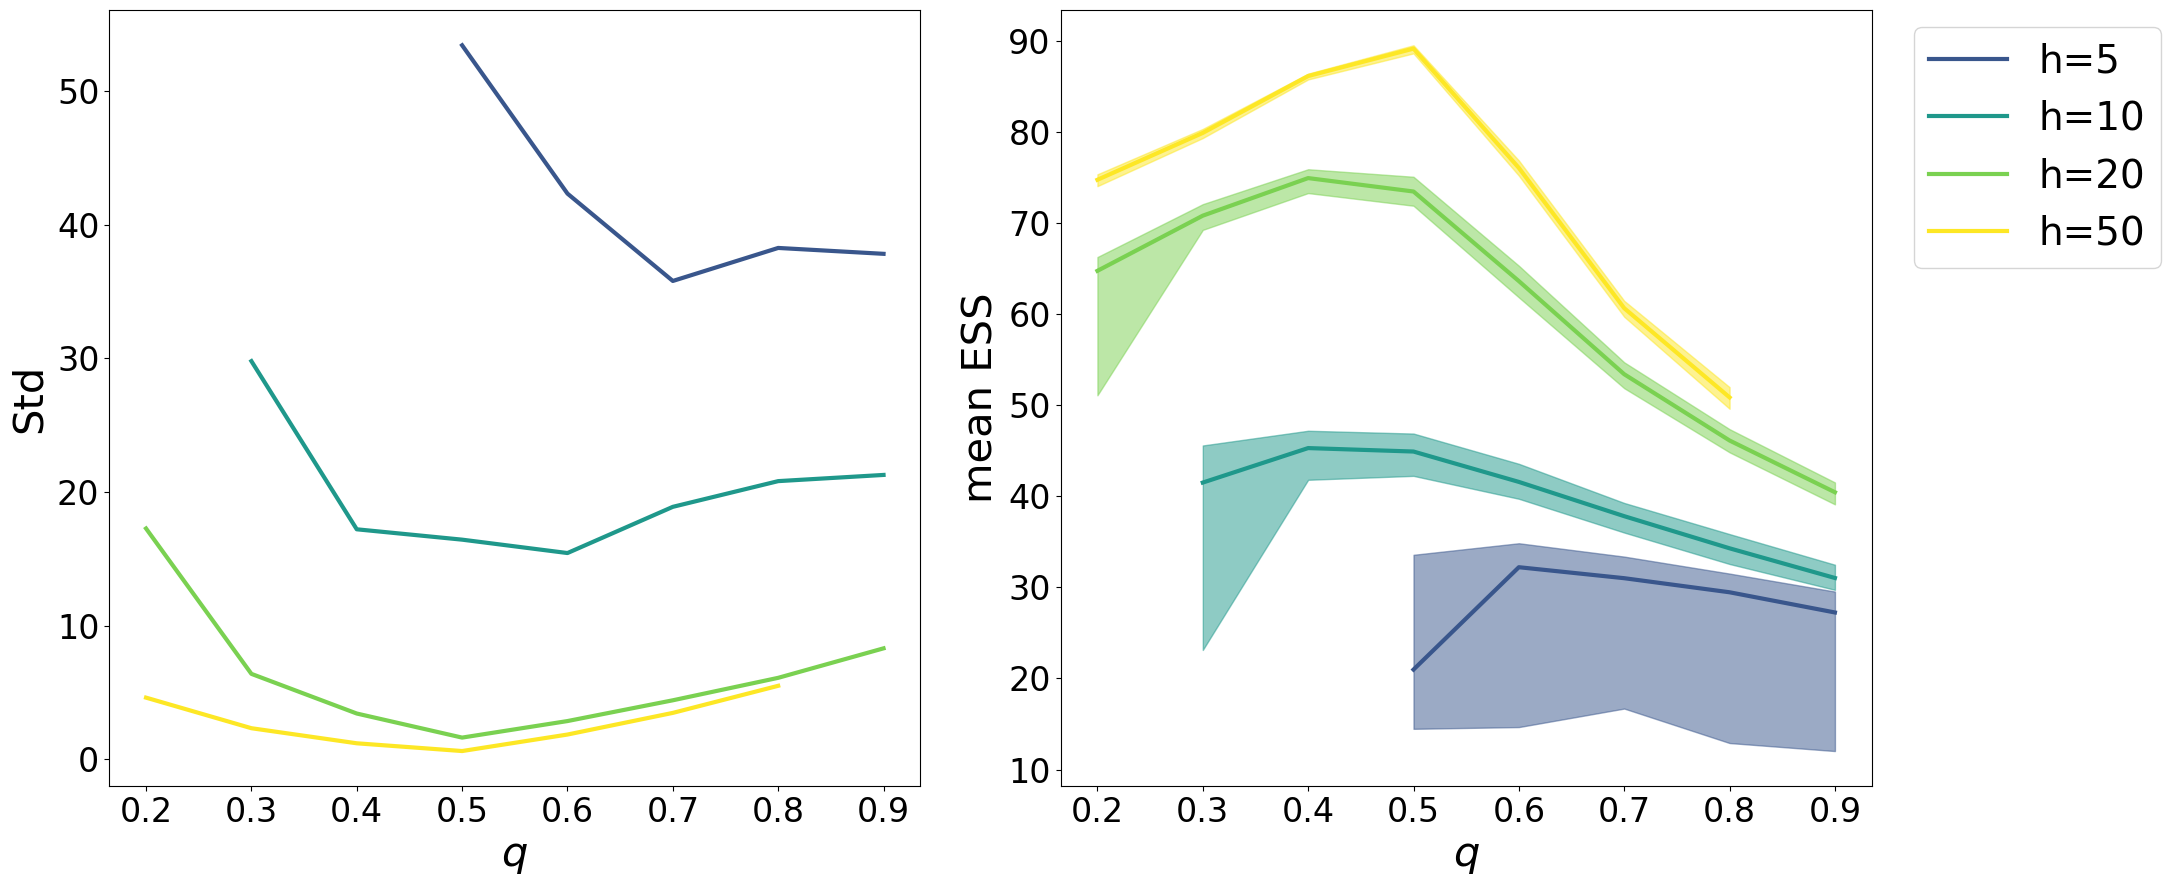

In [16]:
q_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 10), dpi = 100)
fig.tight_layout(pad=7)

ax[0].tick_params(axis='both', labelsize=24)
ax[1].tick_params(axis='both', labelsize=24)

ax[0].set_ylabel(r"Std", fontsize = 30, labelpad = 5)
ax[0].set_xlabel(r"$q$", fontsize = 30, labelpad = 5)
# ax[0, 0].set_xlabel(r"$q$", fontsize = 30, labelpad = 5)
# ax[0, 1].set_xlabel(r"$q$", fontsize = 30, labelpad = 5)
    
for i in range(1, LikelihoodEmission_SIS_NotDGP_numpy_std.shape[1]):
    
    ax[0].plot(q_list, LikelihoodEmission_SIS_NotDGP_numpy_std[:,i], color = color_list[i], label = algorithm_list[i], linewidth = 3)

ax[1].set_ylabel(r"mean ESS", fontsize = 30, labelpad = 5)
ax[1].set_xlabel(r"$q$", fontsize = 30, labelpad = 5)
    
for i in range(1, ESSEmission_SIS_NotDGP_numpy_mean_quantile.shape[2]):
    
    ax[1].plot(q_list, ESSEmission_SIS_NotDGP_numpy_mean_quantile[1,:,i], color = color_list[i], linewidth = 3)
    ax[1].fill_between(q_list, ESSEmission_SIS_NotDGP_numpy_mean_quantile[0,:,i], ESSEmission_SIS_NotDGP_numpy_mean_quantile[2,:,i], color = color_list[i], alpha = 0.5)

fig.legend(bbox_to_anchor=(1.1, 0.9), fontsize = 28)

# Likelihood grid

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
loglikelihood_lambda = np.load("Data/LikelihoodGrid/SEIR_loglikelihood_lambda.npy")
loglikelihood_gamma  = np.load("Data/LikelihoodGrid/SEIR_loglikelihood_gamma.npy")

loglikelihood_gamma_2  = np.load("Data/LikelihoodGrid/partial/SEIR_loglikelihood_gamma.npy")
loglikelihood_gamma[:,:,-1,:] = loglikelihood_gamma_2[:,:,-1,:]

loglikelihood_lambda = loglikelihood_lambda - np.nanmax(np.nanmax(loglikelihood_lambda, axis =0, keepdims=True), axis =1, keepdims=True)
loglikelihood_gamma  = loglikelihood_gamma  -np.nanmax(np.nanmax(loglikelihood_gamma, axis =0, keepdims=True), axis =1, keepdims=True)

C:\Users\loren\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  


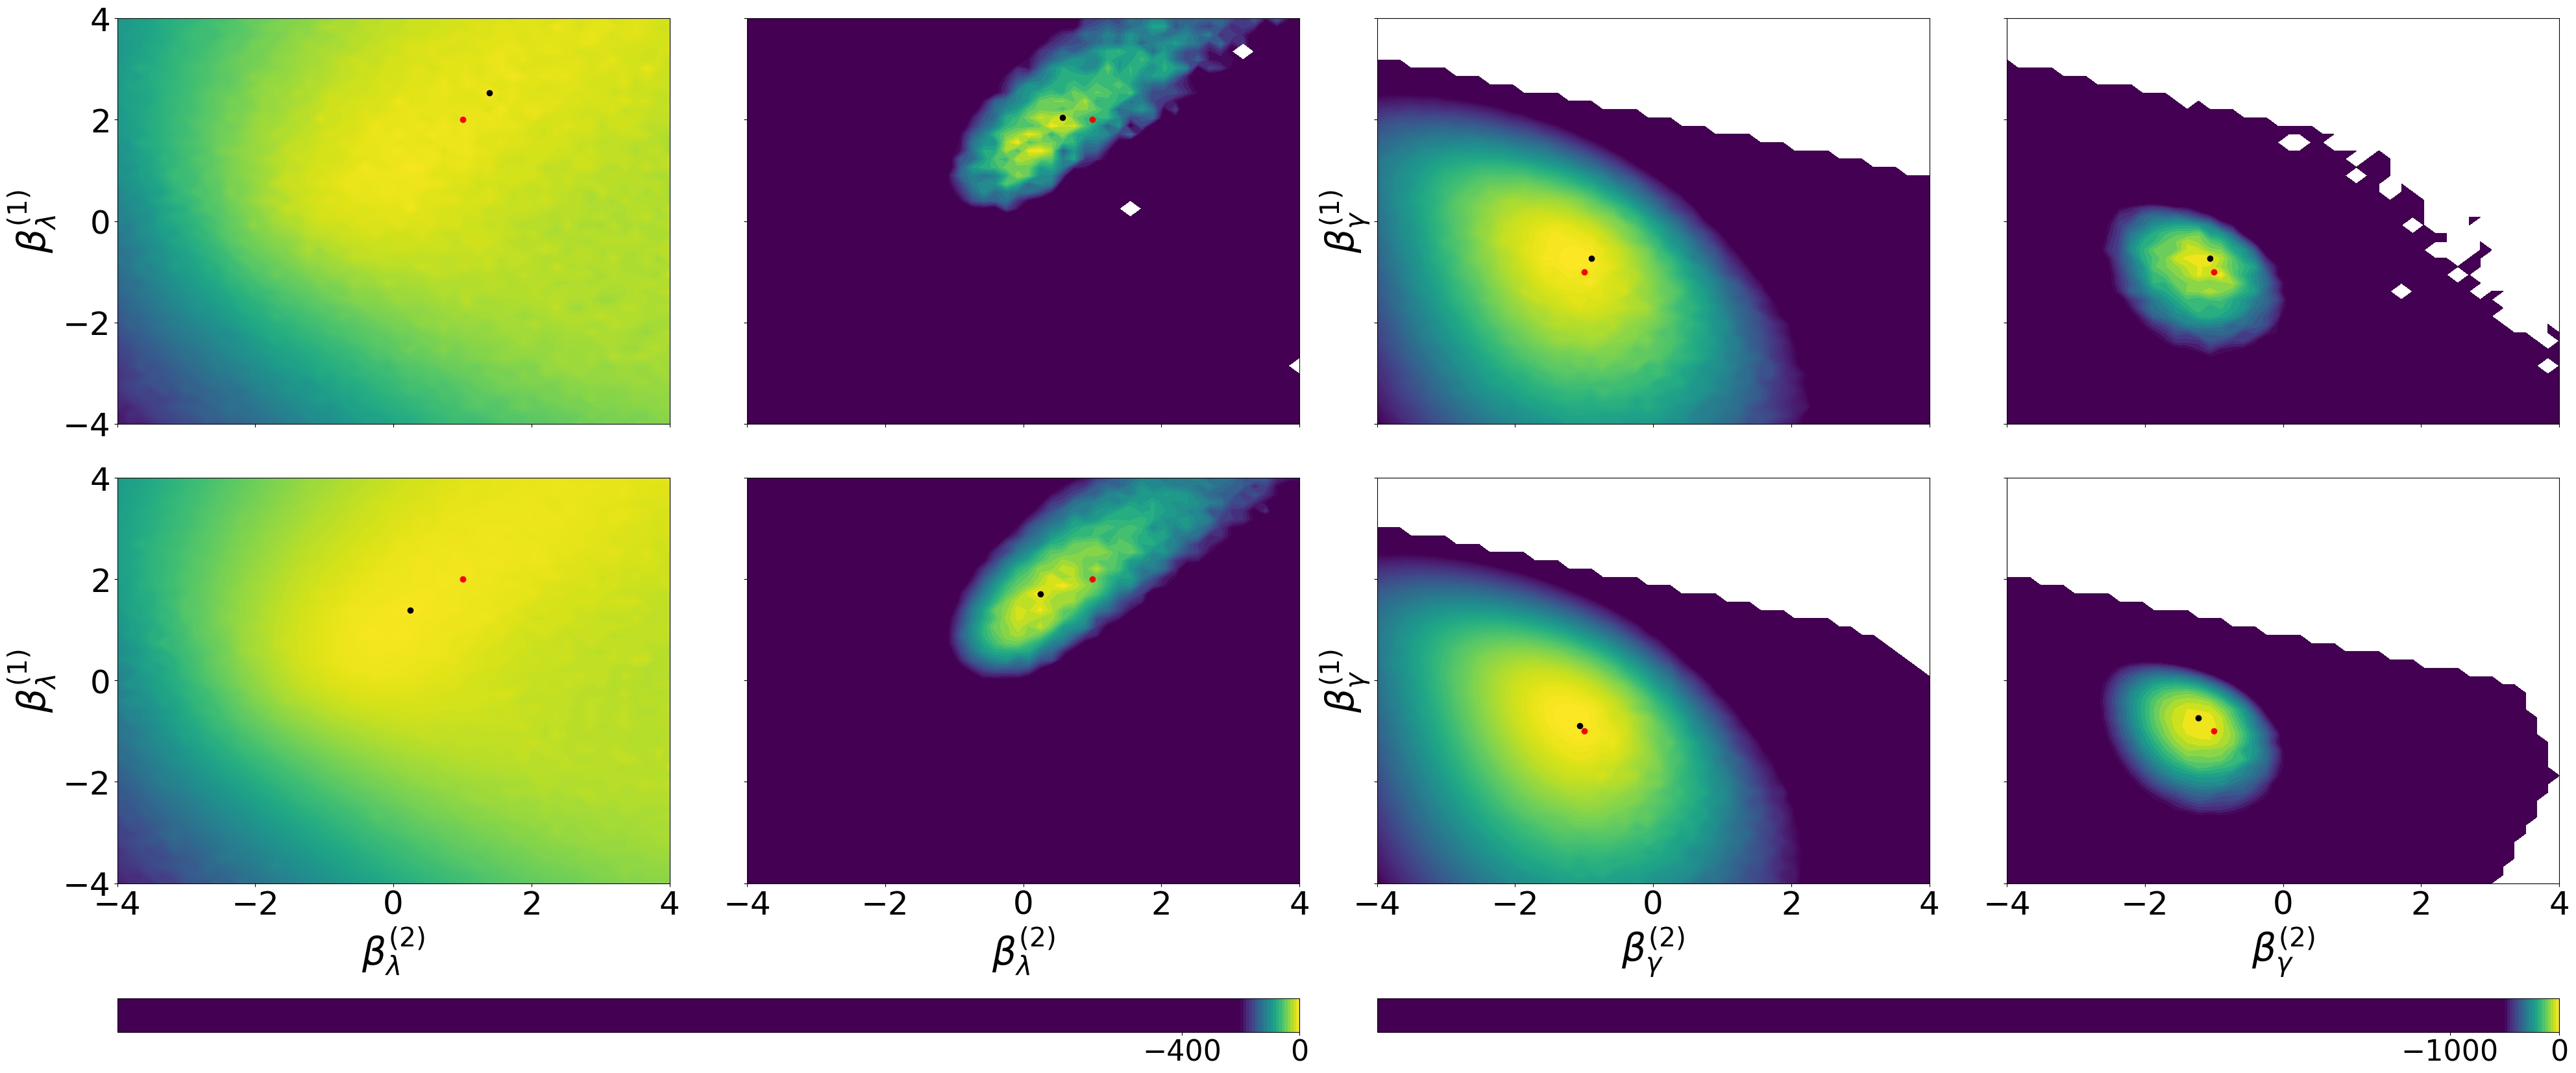

In [21]:
time = [50, 100]

fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (40, 20), sharey = True, sharex =True, dpi = 100)

fig.tight_layout(pad=7)

beta_lambda_grid = np.linspace(-4, 4, 50)
beta_gamma_grid  = np.linspace(-4, 4, 50)

X = np.zeros((50, 50))
Y = np.zeros((50, 50))

for i in range(loglikelihood_lambda.shape[0]):

    for j in range(loglikelihood_lambda.shape[1]):

        X[i,j] = beta_lambda_grid[i]
        Y[i,j] = beta_lambda_grid[j]

for r in range(2):
    for c in range(2):
        Z = loglikelihood_lambda[:,:,c+1,r]
        
        # plots contour lines
        contourf_ = ax[r,c].contourf(X, Y, Z, levels=500, vmin = -200, vmax = 0)
        ax[r,c].scatter([1], [2], color = "red")

        i,j = np.where((Z == np.nanmax(Z)))
        ax[r,c].scatter([X[i,j]], [Y[i,j]], color = "black")

        ax[r,c].tick_params(axis='both', labelsize=36)

        if c==0:
            ax[r,c].set_ylabel(r"$\beta_\lambda^{(1)}$", fontsize = 42, labelpad = 5)
        
        if r==1:
            ax[r,c].set_xlabel(r"$\beta_\lambda^{(2)}$", fontsize = 42, labelpad = 5)

        if r == 0 and c==1:
            cbar = fig.colorbar(contourf_, ax=ax[:,0:2], shrink=1, orientation= "horizontal", pad = 0.1, aspect=35)#, cax = ax[1,0:2])
            cbar.set_ticks([0, -400])
            cbar.ax.tick_params(labelsize= 32)


for r in range(2):
    for c in range(2):
        Z = loglikelihood_gamma[:,:,c+1,r]
        
        # plots contour lines
        contourf_ = ax[r,c+2].contourf(X, Y, Z, levels=500, vmin = -500, vmax = 0)
        ax[r,c+2].scatter([-1], [-1], color = "red")

        i,j = np.where((Z == np.nanmax(Z)))
        ax[r,c+2].scatter([X[i,j]], [Y[i,j]], color = "black")

        ax[r,c+2].tick_params(axis='both', labelsize=36)

        if c==0:
            ax[r,c+2].set_ylabel(r"$\beta_\gamma^{(1)}$", fontsize = 42, labelpad = 5)
        if r==1:
            ax[r,c+2].set_xlabel(r"$\beta_\gamma^{(2)}$", fontsize = 42, labelpad = 5)

        if r == 0 and c==1:
            cbar = fig.colorbar(contourf_, ax=ax[:,2:], shrink=1, orientation= "horizontal", pad = 0.1, aspect=35)#, cax = ax[1,2:])
            cbar.set_ticks([0., -1000])
            cbar.ax.tick_params(labelsize= 32)